# Exercise 1 - Word polarity detection with word embedding
The objective is to build a system that takes as input a word and outputs a probability that the
word has a positive or negative connotation (polarity). As illustrated in Figure 1, the system is
composed of two parts in which the word embedding part will leverage on pre-trained vectors
such as the one obtained with word2vec or GloVe. If you are not familiar with word embeddings,
we recommend you to watch the class material including videos and pdf posted on Moodle.


a) Read lexicons. Download lists of positive and negative words from the Opinion Lexicon
available from https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html. A zip
is also provided on Moodle. Listing 1 provides an example of function to read the lexicons.
You may want to complete the code to remove lines that start with ;, that end with +
and to remove empty lines. You should get 2005 positive words and 4783 negative words.

In [2]:
def read_vocabulary_from_file (filename ):
  with open(filename , 'r', encoding ="ISO−8859−1") as f:
    content = f. readlines () # content is a list of lines
    content = [x.strip () for x in content] # removing newline chars

    # Remove elements containing ';' and '+'
    content = [x for x in content if ';' not in x and len(x) > 0]
    content = [x for x in content if '+' not in x and len(x) > 0]

    return content


In [7]:
# LOAD OPINION LEXICON
home_dir = 'opinion-lexicon-English/'
neg_file = home_dir + 'negative-words.txt'
pos_file = home_dir + 'positive-words.txt'

vocab_neg = read_vocabulary_from_file(neg_file)
vocab_pos = read_vocabulary_from_file(pos_file)
print("="*50)
print("OPINION LEXICON - ENGLISH")
print("="*50)
print("Loaded negative words: {} words".format(len(vocab_neg)))
print("Loaded positive words: {} words".format(len(vocab_pos)))

OPINION LEXICON - ENGLISH
Loaded negative words: 4783 words
Loaded positive words: 2005 words


b) Convert words into vectors. You can here go for two options : either by querying
an online API that returns you the vectors for a given word, or download a pre-trained
word-vector dictionary (word2vec, GloVe, etc.). The code provided in Listing 2 shows you
how to realise this using a GloVe embedding – zip also provided on Moodle.


In [23]:
import numpy as np

# to get GloVe vectors: wget http://nlp.stanford.edu/data/glove.6B.zip
def load_glove_embeddings (path):
  embeddings = {}
  with open(path , 'r', encoding ='utf−8') as f:
    for line in f:
      values = line.strip ().split ()
      w = values[0]
      vectors = np.asarray(values[1:], dtype='float32')
      embeddings [w] = vectors
  return embeddings

# online query
import requests
import json

word = 'happy'
response = requests.get('https://icoservices.k8s.tic.heia-fr.ch/word-embedding/wordvector/word2vec/en/' + word)
vector = response.json ()
print(vector)

# off−line dictionary
word_dict = load_glove_embeddings ('./glove.6B.50d.txt')
word = 'happy'
vector = word_dict [word] # if word is in word_dict
print(vector)

[5.6506757736206055, 12.520734786987305, -3.6179394721984863, 5.632171630859375, -3.351313352584839, -2.549443244934082, -2.328282117843628, 1.6070698499679565, -2.63830304145813, -1.2330397367477417, -3.712287425994873, 4.76062536239624, 1.0341637134552002, 2.15838885307312, -3.3286218643188477, -4.111255168914795, 1.6341111660003662, -1.8190534114837646, 3.094416379928589, 1.0175750255584717, -0.6583362817764282, 0.2975451350212097, -6.7455902099609375, -0.6072280406951904, -0.4232602119445801, -3.6135027408599854, 2.020463705062866, 8.311285972595215, 0.9904295206069946, 8.244004249572754, -1.4143904447555542, -6.177243232727051, -2.0402798652648926, 1.218432068824768, -0.2812301516532898, -2.2428207397460938, 2.5753173828125, -0.17160016298294067, -2.9521965980529785, -1.6330070495605469, 2.1099538803100586, -1.197441577911377, -5.9389567375183105, -2.6153135299682617, 0.42052891850471497, 1.6437393426895142, 2.9179530143737793, -0.4194609820842743, 3.8722822666168213, -2.620629072

c) Prepare the training and testing sets. Prepare the tensors X_train for training
by taking the corresponding vectors of 1500 positive and 1500 negative words from the
lexicon. Prepare the Y_train target output tensor corresponding to the training set. You
can, for example use the target [1.0, 0.0] for a positive word and [0.0, 1.0] for a negative
word. For an embedding dimension of 50, the shapes of your X_train and Y_train tensors
should be (3000,50) and (3000,2). In a similar way, prepare X_test and Y_test tensors.

In [35]:
import random

# Negative [0.0, 1.0]
dataset_neg = [(l, [0.0, 1.0]) for l in vocab_neg if l in word_dict]
print(len(dataset_neg))

# Positive [1.0, 0.0]
dataset_pos = [(l, [1.0, 0.0]) for l in vocab_pos if l in word_dict]
print(len(dataset_pos))

# Shuffle dataset
random.shuffle(dataset_neg)
random.shuffle(dataset_pos)

# 1500 each for training
train_dataset = dataset_neg[:1500] + dataset_pos[:1500]
test_dataset = dataset_neg[1500:] + dataset_pos[1500:]

print()
print("Training dataset: {} items".format(len(train_dataset)))
print(train_dataset[:10])
print()
print("Test dataset: {} items".format(len(test_dataset)))
print(test_dataset[:10])

4345
1893

Training dataset: 3000 items
[('weariness', [0.0, 1.0]), ('absentee', [0.0, 1.0]), ('suicide', [0.0, 1.0]), ('obnoxiously', [0.0, 1.0]), ('lag', [0.0, 1.0]), ('dissenter', [0.0, 1.0]), ('brood', [0.0, 1.0]), ('unsupportive', [0.0, 1.0]), ('deadweight', [0.0, 1.0]), ('fuck', [0.0, 1.0])]

Test dataset: 3238 items
[('seething', [0.0, 1.0]), ('disagreeing', [0.0, 1.0]), ('disturbingly', [0.0, 1.0]), ('lawlessness', [0.0, 1.0]), ('jeers', [0.0, 1.0]), ('reluctance', [0.0, 1.0]), ('tanked', [0.0, 1.0]), ('admonishment', [0.0, 1.0]), ('dehumanize', [0.0, 1.0]), ('extravagance', [0.0, 1.0])]


In [41]:
X_train = np.asarray([word_dict[x[0]] for x in train_dataset])
Y_train = np.asarray([x[1] for x in train_dataset])
    
print(X_train.shape)
print(X_train)
print(Y_train.shape)

(3000, 50)
[[-0.43838   0.451    -0.073451 ...  0.24796  -0.33154  -0.68768 ]
 [-0.20688  -1.1166    1.1807   ...  0.65013   0.41145  -0.74624 ]
 [ 1.1757   -0.32014   0.60612  ...  0.093088  0.89971  -0.079391]
 ...
 [ 0.39243   0.29377  -0.2417   ...  1.1159    0.53124   0.22824 ]
 [-0.25846   0.69529   1.2285   ...  0.576    -0.31104   0.37334 ]
 [-0.23231   0.87132  -0.076435 ... -0.15028  -0.61933  -0.16051 ]]
(3000, 2)


In [42]:
X_test = np.asarray([word_dict[x[0]] for x in test_dataset])
Y_test = np.asarray([x[1] for x in test_dataset])

print(X_test.shape)
print(Y_test.shape)

(3238, 50)
(3238, 2)


d) Train and evaluate a classifier. Build a model, e.g. a double Dense layers in Keras
(MLP) and train it. Report on the evolution of the loss and accuracy along the epochs.
You should reach about 90% accuracy on the training set and 85% accuracy on the test
set. Report on your model structure and fitting strategy.


In [44]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn import metrics

In [49]:
# Define our model
model = Sequential()

model.add(Dense(128, input_shape=X_train[0].shape))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               6528      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 6,786
Trainable params: 6,786
Non-trainable params: 0
_________________________________________________________________


In [50]:
log = model.fit(X_train, Y_train, epochs=100, batch_size=128)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6119 - accuracy: 0.6628
Epoch 2/100
24/24 [==============================] - 0s 796us/step - loss: 0.3593 - accuracy: 0.8446
Epoch 3/100
24/24 [==============================] - 0s 707us/step - loss: 0.3163 - accuracy: 0.8696
Epoch 4/100
24/24 [==============================] - 0s 672us/step - loss: 0.3234 - accuracy: 0.8626
Epoch 5/100
24/24 [==============================] - 0s 697us/step - loss: 0.3140 - accuracy: 0.8698
Epoch 6/100
24/24 [==============================] - 0s 689us/step - loss: 0.3347 - accuracy: 0.8467
Epoch 7/100
24/24 [==============================] - 0s 711us/step - loss: 0.3417 - accuracy: 0.8641
Epoch 8/100
24/24 [==============================] - 0s 710us/step - loss: 0.3228 - accuracy: 0.8623
Epoch 9/100
24/24 [==============================] - 0s 710us/step - loss: 0.3050 - accuracy: 0.8790
Epoch 10/100
24/24 [==============================] - 0s 830us/step - loss: 0.3157 - accuracy

24/24 [==============================] - 0s 779us/step - loss: 0.2957 - accuracy: 0.8748
Epoch 82/100
24/24 [==============================] - 0s 813us/step - loss: 0.3124 - accuracy: 0.8692
Epoch 83/100
24/24 [==============================] - 0s 780us/step - loss: 0.2995 - accuracy: 0.8821
Epoch 84/100
24/24 [==============================] - 0s 769us/step - loss: 0.3258 - accuracy: 0.8582
Epoch 85/100
24/24 [==============================] - 0s 761us/step - loss: 0.3227 - accuracy: 0.8606
Epoch 86/100
24/24 [==============================] - 0s 758us/step - loss: 0.3077 - accuracy: 0.8666
Epoch 87/100
24/24 [==============================] - 0s 763us/step - loss: 0.2970 - accuracy: 0.8737
Epoch 88/100
24/24 [==============================] - 0s 706us/step - loss: 0.3312 - accuracy: 0.8590
Epoch 89/100
24/24 [==============================] - 0s 697us/step - loss: 0.3202 - accuracy: 0.8681
Epoch 90/100
24/24 [==============================] - 0s 717us/step - loss: 0.3051 - accuracy: 

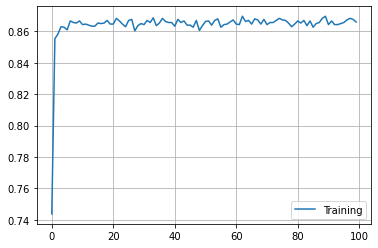

In [51]:
import matplotlib.pyplot as plt

plt.plot(log.history['accuracy'], label='Training')
plt.legend()
plt.grid()

In [52]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 86.751080


e) Analysis of results and discussions. Report on your experiments and comment your
classification performances. Find 5 to 10 words which are not in your training set and on
which the system thinks it is clearly positive or negative. Find some words on which the
system hesitates, i.e. with output probabilities in range [0.4-0.6]). Are these words and
outputs making sense to you ?


In [55]:
from scipy import spatial
import pandas as pd

Y_pred = model.predict(X_test)
print(Y_pred)
print(Y_test)

dist = spatial.distance.cosine(Y_pred[0], Y_test[0])
print(dist)

columns_name = ["word", "label", "pred", "dist"]
df_pred = pd.DataFrame(columns = columns_name)

for i in range(len(Y_test)):
    if Y_test[i][0]== 0:
        lbl = "neg"
    else:
        lbl = "pos"
    df_pred = df_pred.append({'word': test_dataset[i][0],         
                    'label': lbl,
                    'pred': Y_pred[i],
                    'dist': spatial.distance.cosine(Y_pred[i], Y_test[i])
                             },
                             ignore_index = True
                            )


[[0.00412393 0.99587613]
 [0.13236877 0.86763126]
 [0.09507057 0.9049294 ]
 ...
 [0.8593548  0.14064519]
 [0.9422926  0.05770747]
 [0.8078514  0.1921487 ]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
8.554486844447595e-06


In [56]:
# Top negative words
df_top_neg = df_pred[df_pred['label']=='neg'].sort_values(by=['dist'], ascending=True)
print(df_top_neg.head())

            word label                         pred          dist
2053     rampant   neg   [0.00015515032, 0.9998448]  1.204889e-08
489         rash   neg   [0.00015562224, 0.9998443]  1.212305e-08
564   starvation   neg   [0.0002941242, 0.99970585]  1.635247e-08
711        leaks   neg    [0.00026403638, 0.999736]  2.477263e-08
1296     scandal   neg  [0.00024574407, 0.99975425]  2.942258e-08


In [57]:
# Top positive words
df_top_pos = df_pred[df_pred['label']=='pos'].sort_values(by=['dist'], ascending=True)
print(df_top_pos.head())

            word label                        pred          dist
3139       award   pos  [0.9999893, 1.0706776e-05]  5.755529e-11
3122  excellence   pos   [0.9999888, 1.116191e-05]  6.278489e-11
2907       prize   pos   [0.9999236, 7.642538e-05]  2.919931e-09
3028  innovative   pos  [0.9998759, 0.00012406897]  7.701928e-09
2894  all-around   pos  [0.9997049, 0.00029506258]  1.607136e-08


In [58]:
# The most mistaken words
df_top_wrong = df_pred.sort_values(by=['dist'], ascending=False)
print(df_top_wrong.head())

              word label                       pred      dist
237       grudging   neg   [0.998676, 0.0013239147]  0.998674
1324          vice   neg  [0.99258596, 0.007413982]  0.992531
3126         eases   pos  [0.008551548, 0.99144846]  0.991375
780   incomparable   neg   [0.9913413, 0.008658766]  0.991266
1614  incomparably   neg  [0.9892244, 0.0107755875]  0.989108


In [59]:
# Words with hesitation
df_hes = df_pred[(df_pred['dist']>0.4) & (df_pred['dist']<0.6)]
print(df_hes)

              word label                      pred      dist
48      freakishly   neg  [0.60037655, 0.39962336]  0.445902
55          scarce   neg   [0.6565204, 0.34347966]  0.536429
86          madden   neg    [0.6914891, 0.3085109]  0.592558
117   unsettlingly   neg  [0.62143356, 0.37856644]  0.479750
119       inferior   neg    [0.6624995, 0.3375005]  0.546073
...            ...   ...                       ...       ...
3067   subsidizing   pos  [0.31554046, 0.68445945]  0.581340
3088       staunch   pos  [0.42361578, 0.57638425]  0.407788
3149       idolize   pos   [0.4160997, 0.58390033]  0.419660
3209      famously   pos  [0.39122415, 0.60877585]  0.459371
3218      morality   pos   [0.3078024, 0.69219756]  0.593686

[119 rows x 4 columns]
